In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-1,1,50)
y = 2*x+1
plt.plot(x,y)
# plt.show()

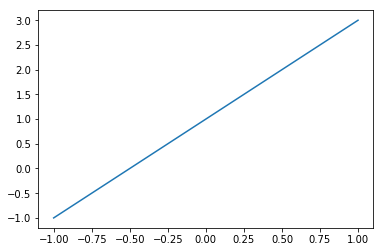

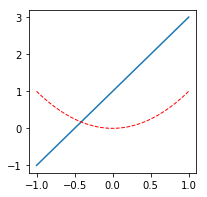

In [2]:
y1 = x**2
# figure后面的可以作为一个figure的开头, 直到另外一个figure()都是一个figure
plt.figure()
plt.plot(x,y)

plt.figure(num=3, figsize=(3,3))
plt.plot(x,y)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')

[-1.   -0.25  0.5   1.25  2.  ]


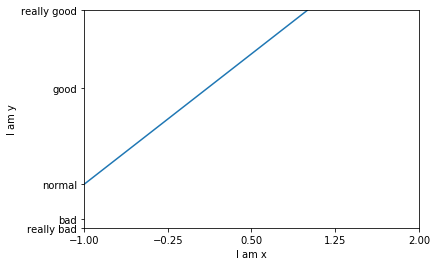

In [3]:
plt.figure()
plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am x')
plt.ylabel('I am y')

new_ticks = np.linspace(-1,2,5)
print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],['really bad','bad','normal','good',
                               'really good'])
plt.plot(x,y)

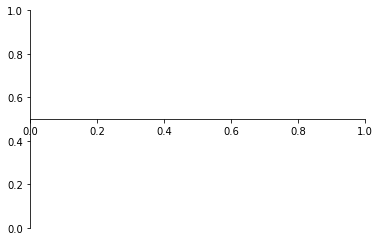

In [6]:
# gca = 'get current axis'
ax = plt.gca()
# 脊梁是4个边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# 将x轴绑定在y轴的-1的位置
ax.spines['bottom'].set_position(('data',0.5))
# 将y轴放在x轴的0的位置 ('data',0) 其他的有 'outward' 'axes' 百分之多少
ax.spines['left'].set_position(('data',0))


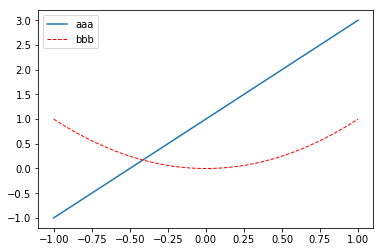

In [7]:
# 制作一个图例
plt.figure()
line_1, = plt.plot(x,y,label='up')
line_2, = plt.plot(x,y1,label='down',color='red',linewidth=1.0,linestyle='--')
plt.legend(handles=[line_1,line_2],labels=['aaa','bbb'],loc='best') # [upper center lower] [left right]

Text(-3.7, 3, 'This is some text')

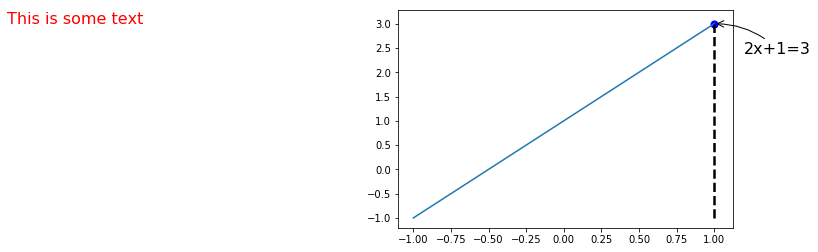

In [10]:
# 添加注解
plt.figure()
plt.plot(x,y,label='up')
x0,y0 = 1,3
# 添加一个单点, size=50 color=blue
plt.scatter(x0,y0,s=50,color='b')
# k-- 表示k的黑色, style是虚线--
plt.plot([x0,x0],[-1,y0],'k--',lw=2.5)

# 标注
plt.annotate('2x+1=3',xy=(x0,y0),xycoords='data',xytext=(+30,-30),textcoords='offset points',fontsize=16,arrowprops
            = dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
# 另外一种方法
plt.text(-3.7,3,'This is some text',fontdict={'size':16,'color':'r'})

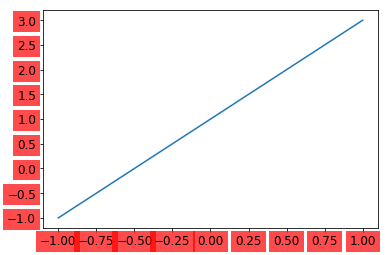

In [12]:
plt.figure()
plt.plot(x,y,label='up')
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='red',edgecolor='None',alpha=0.7))

([], <a list of 0 Text yticklabel objects>)

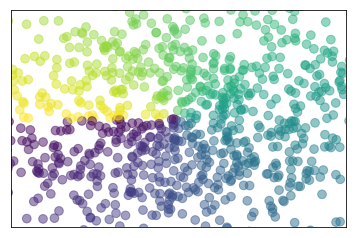

In [16]:
# 散点图
n = 1024
# 高斯分布 
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
# 计算颜色, 以角度得到颜色值
C = np.arctan2(Y,X)
# 颜色地图cmap
plt.scatter(X,Y,s=75,c=C,alpha=0.5)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
# 将坐标轴隐藏
plt.xticks(())
plt.yticks(())


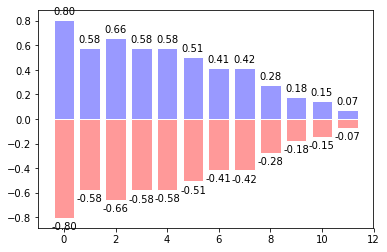

In [24]:
# 柱状图
n = 12
X = np.arange(n)
# uniform 是在0.5到1的均匀分布
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
# Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = -Y1

plt.bar(X,Y1,facecolor='#9999ff',edgecolor='white')
plt.bar(X,Y2,facecolor='#ff9999',edgecolor='white')

for x,y in zip(X,Y1):
    # ha horizontal alignment
    plt.text(x,y+0.03,'%.2f'%y,ha='center',va='bottom')

for x,y in zip(X,Y2):
    plt.text(x,y-0.03,'%.2f'%y,ha = 'center',va = 'top')

<a list of 9 text.Text objects>

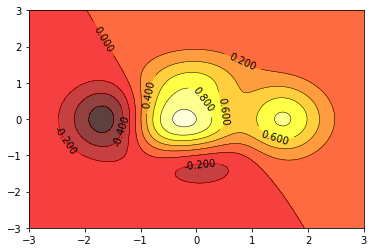

In [27]:
# 等高线图
def func(x,y):
    # 计算高度的值
    return (1-x/2+x**5+y**3)* np.exp(-x**2 - y**2)
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
# 生成网
X,Y = np.meshgrid(x,y)
# 绘制颜色 hot 或者cool. 8是指将等高线分成8段
plt.contourf(X,Y,func(X,Y),8,alpha=0.75,cmap=plt.cm.hot)

# 等高线的绘制
C = plt.contour(X,Y,func(X,Y),8,colors='black',linewidths=0.5)
# 等高线的标注的绘制, inline是绘制在线里面
plt.clabel(C,inline=True,fontsize=10)

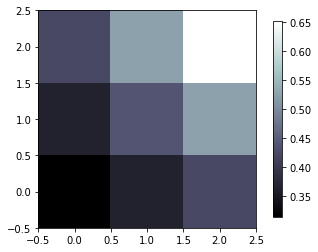

In [30]:
# 绘制图像
# image data
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
# https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html 可以查看interpolation的种类
# cmap的另外一种选择方式, origin = ['lower','upper']
plt.imshow(a,interpolation='nearest',cmap='bone',origin='lower')
# 添加 color bar, shrink是bar的长度
plt.colorbar(shrink=0.9)

(-2, 2)

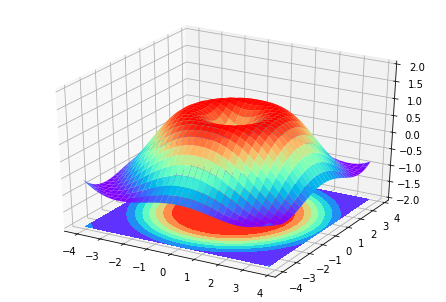

In [33]:
# 使用3D图像
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# 在fig上面添加一个坐标轴
ax = Axes3D(fig)
# X, Y的值
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)

X,Y = np.meshgrid(X,Y)
# 计算Z的值
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)
# rstride row-stride cstride column stride. 
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# contour field
ax.contourf(X,Y,Z,zdir='z',offset=-2,cmap='rainbow')
ax.set_zlim(-2,2)

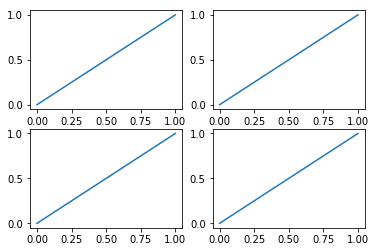

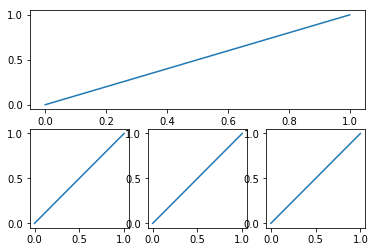

In [39]:
# 在figure中分割出多个子图
plt.figure()
# 给定一个位置的描述, 将figure分成两行两列,然后在第一个位置plot一个东西
plt.subplot(2,2,1)
plt.plot([0,1],[0,1])

plt.subplot(2,2,2)
plt.plot([0,1],[0,1])

plt.subplot(2,2,3)
plt.plot([0,1],[0,1])

plt.subplot(2,2,4)
plt.plot([0,1],[0,1])

# 另外一种方法得到, 1+3的组合
plt.figure()

plt.subplot(2,1,1)
plt.plot([0,1],[0,1])

plt.subplot(2,3,4)
plt.plot([0,1],[0,1])

plt.subplot(2,3,5)
plt.plot([0,1],[0,1])

plt.subplot(2,3,6)
plt.plot([0,1],[0,1])

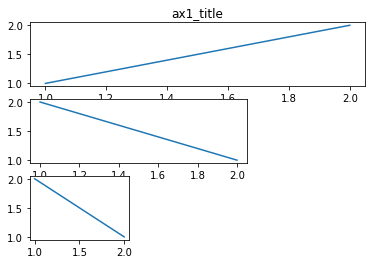

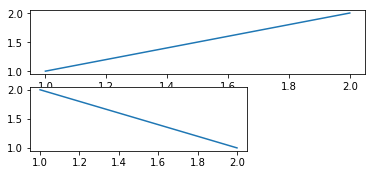

<Figure size 432x288 with 0 Axes>

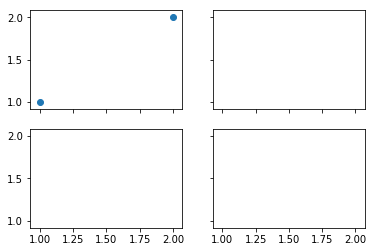

In [45]:
# 分格显示, 三种方法
# 第一种方法 subplot2grid
plt.figure()
# 3,3 代表整个图的大小, 0 0 是起始点,
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3,rowspan=1)
ax1.plot([1,2],[1,2])
# 以ax开始的函数都是set_开头的
ax1.set_title('ax1_title')
# 1代表行, 先行后列
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=1)
ax2.plot([2,1],[1,2])
ax3 = plt.subplot2grid((3,3),(2,0),colspan=1,rowspan=1)
ax3.plot([2,1],[1,2])


# 第二种方法 gridspec, 需要import一下
import matplotlib.gridspec as gridspec
plt.figure()
gs = gridspec.GridSpec(3,3)
# 第0行,将整个列都占用了
ax1 = plt.subplot(gs[0,:])
ax1.plot([1,2],[1,2])
# 第1行 0到1列都占用了
ax2 = plt.subplot(gs[1,:2])
ax2.plot([2,1],[1,2])

# 第三种方法 easy to define structure
# 共享x轴,共享y轴, 将所有的格式得到了
plt.figure()
f,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2,sharex=True,sharey=True)
ax11.scatter([1,2],[1,2])

Text(0.5, 1.0, 'title inside 2')

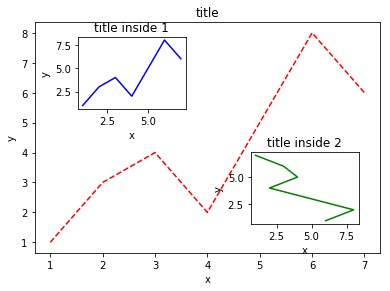

In [49]:
# 图中图
fig = plt.figure()
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]
# 使用add_axes添加图
left,bottom,width,height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(x,y,'r--')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

left,bottom,width,height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left,bottom,width,height])
ax2.plot(x,y,'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')
# 默认跟着plt.axes
plt.axes([0.6,0.2,0.25,0.25])
plt.plot(y[::-1],x,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

Text(0, 0.5, 'Y2')

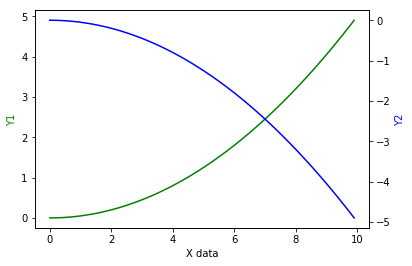

In [53]:
# 使用主次坐标轴, 共享x, 分别有y轴
x = np.arange(0,10,0.1)
y1 = 0.05*x **2
y2 = -y1

fig,ax1 = plt.subplots()
# 使用镜面的效果将 axes2 使用为 axes1的镜像
ax2 = ax1.twinx()

ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')

ax1.set_xlabel('X data')

ax1.set_ylabel('Y1',color='g')
ax2.set_ylabel('Y2', color='b')



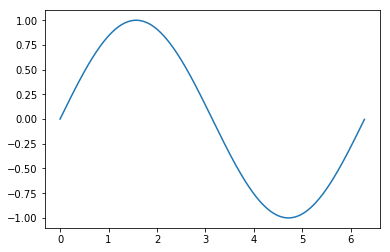

In [58]:
from matplotlib import animation

# 如何使用动画的形式, 展示出数据
fig, ax = plt.subplots()
x = np.arange(0,2*np.pi,0.01)
line, = ax.plot(x,np.sin(x))
# 第i帧
def animate(i):
    line.set_ydata(np.sin(x+i/100))
    return line,
# 定义
def init():
    line.set_ydata(np.sin(x))
    return line,

# 如何产生动画? frames的总共长度, interval 是更新间隔 ms, blit 是否更新整张图片 
ani = animation.FuncAnimation(fig=fig,func=animate, frames=100, init_func=init, interval =20, blit=False)

# 保存动画
# ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264']
